In [169]:
import pandas as pd

#Use Pandas to import the data from "fcc-forum-pageviews.csv". 
# Set the index to the date column.
df = pd.read_csv('fcc-forum-pageviews.csv', sep = ',',index_col='date',parse_dates=True)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [170]:
#Clean the data by filtering out days when the page views were in the 
# top 2.5% of the dataset or bottom 2.5% of the dataset.
df=df[df['value']>=df['value'].quantile(0.025)]
df=df[df['value']<=df['value'].quantile(0.975)]

df.count()

value    1239
dtype: int64

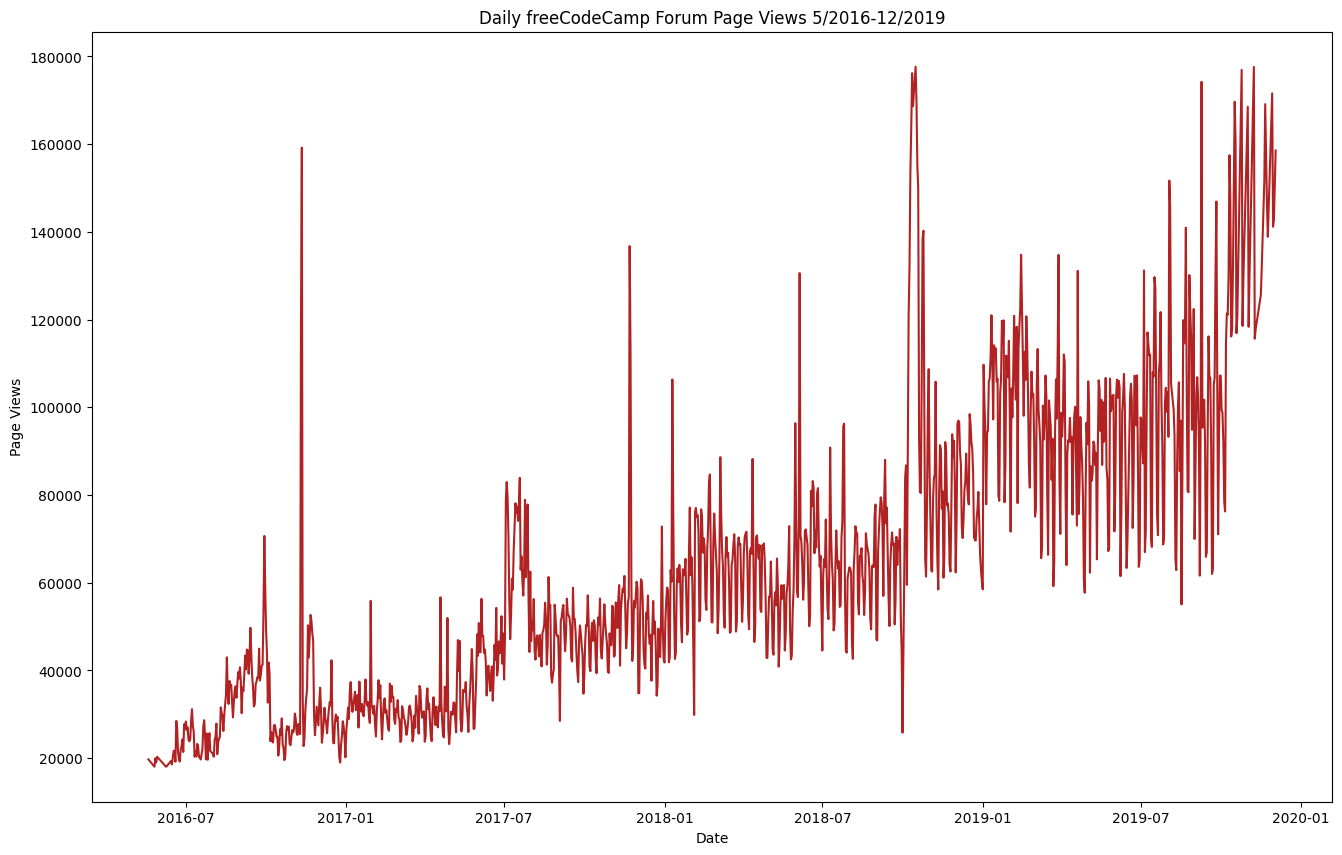

In [171]:
import matplotlib.pyplot as plt

#Create a draw_line_plot function that uses Matplotlib to draw a 
# line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis 
# should be Page Views.

def draw_line_plot():
    plt.figure(figsize=(16, 10))
    plt.plot(df.index,df['value'],color="firebrick")

    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    plt.show()

draw_line_plot()


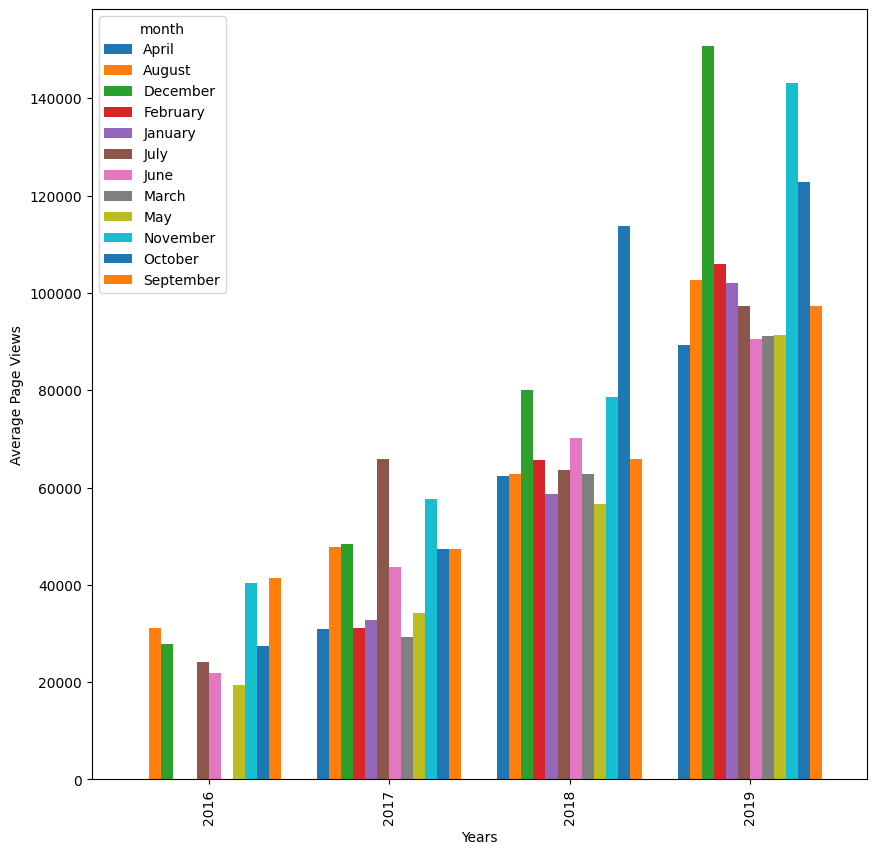

In [172]:
#Create a draw_bar_plot function that draws a bar chart similar to 
# "examples/Figure_2.png". It should show average daily page views 
# for each month grouped by year. The legend should show month labels 
# and have a title of Months. On the chart, the label on the x axis 
# should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    df_bar = df.copy(deep=True)
    df_bar['year']=df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    df_pivot = df_bar.pivot_table(values='value', index='year', columns='month', aggfunc='mean')

    df_pivot.plot(kind='bar', figsize=(10, 10), width=0.8)
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")

draw_bar_plot()

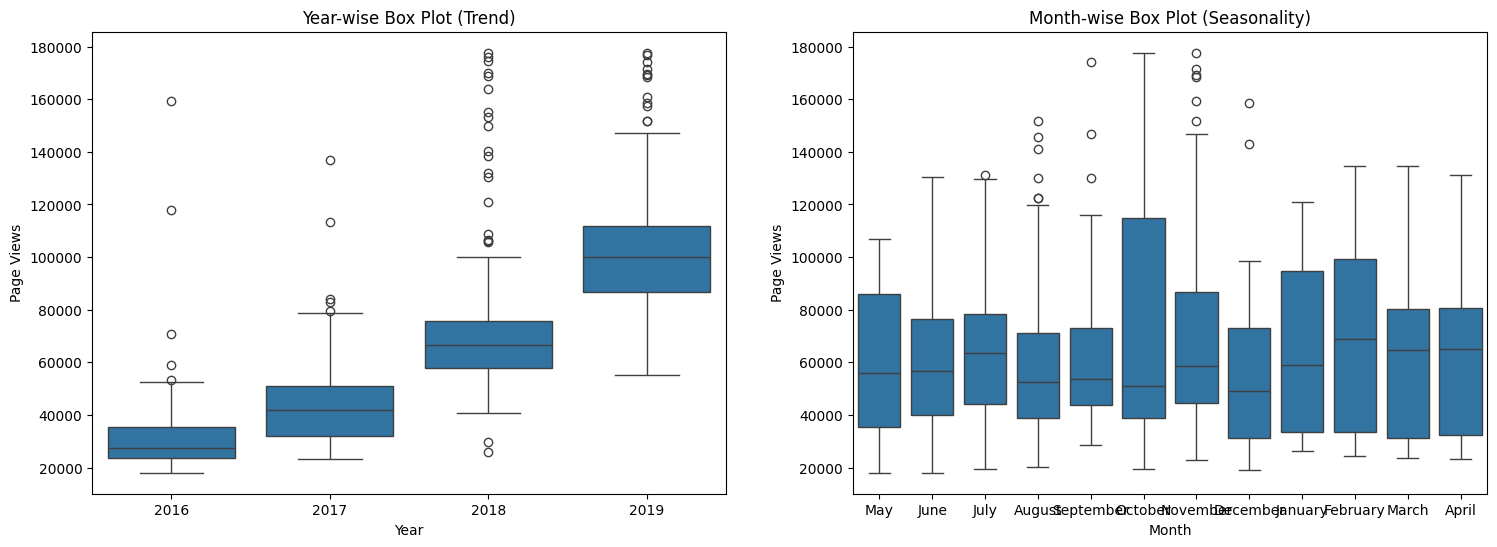

In [173]:
import seaborn as sns

#Create a draw_box_plot function that uses Seaborn to draw two 
# adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed 
# within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) 
# and the title of the second chart should be Month-wise Box Plot 
# (Seasonality). Make sure the month labels on bottom start at Jan 
# and the x and y axis are labeled correctly. The boilerplate includes 
# commands to prepare the data.

def draw_box_plot():
    df_box = df.copy(deep=True)
    df_box['year']=df_box.index.year
    df_box['month'] = df_box.index.month_name()

    plt.subplots(1,2,figsize=(18,6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_box['year'],y=df['value'])
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_box['month'], y=df_box['value'])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')

draw_box_plot()
